In [10]:
from sqlalchemy import create_engine, Column, Integer, Float, String, Boolean, ForeignKey, func, desc, MetaData, Table
from sqlalchemy.orm import sessionmaker, relationship, declarative_base

# Define the base class
Base = declarative_base()

In [14]:
# Create the database engine
engine = create_engine('sqlite:///vivino.db')

# Define the structure of the table you are interacting with
metadata = MetaData()

# If the 'keywords' table already exists and you just need to reflect its structure, use autoload_with:
keywords_table = Table('keywords', metadata, autoload_with=engine)

In [15]:
# Create a session
Session = sessionmaker(bind=engine)
session = Session()

# Query the database to select all the keyword names
query = session.query(keywords_table.c.name)

In [18]:
# Execute the query and retrieve the results
keywords_list = [row[0] for row in query.all()]

# Close the session
session.close()

# Now keywords_list contains all the keyword names from the 'keywords' table
for key in keywords_list:
    print(key)

5-spice powder
acacia
acai berry
aleppo pepper
allspice
almond
anise
aniseed
apple
apple blossom
apricot
apricot jam
arugula
ash
asian pear
asparagus
baby's breath
bacon fat
baked apple
baking chocolate
baking spice
balsamic
banana
barbecue meat
barbecue smoke
bay leaf
beef broth
beeswax
bell pepper
bergamot
berry jam
berry sauce
bilberry
bing cherry
biscuit
bitter almond
black cherry
black fruit
black licorice
black olive
black plum
black raisin
black raspberry
black truffle
black walnut
blackberry
blackberry jam
blackberry sauce
blackcurrant
blackcurrant jam
blood orange
blueberry
boysenberry
bramble
brazil nut
bread yeast
brioche
brown bread
brown butter
brown sugar
bruised apple
bubblegum
burnt caramel
burnt sugar
butter
buttered popcorn
butterscotch
campfire
camphor
candied ginger
candy-cap mushroom
canned peach
cantaloupe
caramel
caramel popcorn
carob
castelvetrano olive
cedar
celery
chalk
chalk dust
chamomile
charcoal
chard
cheese
cheesy
cherry
cherry cola
cherry cough syrup
che

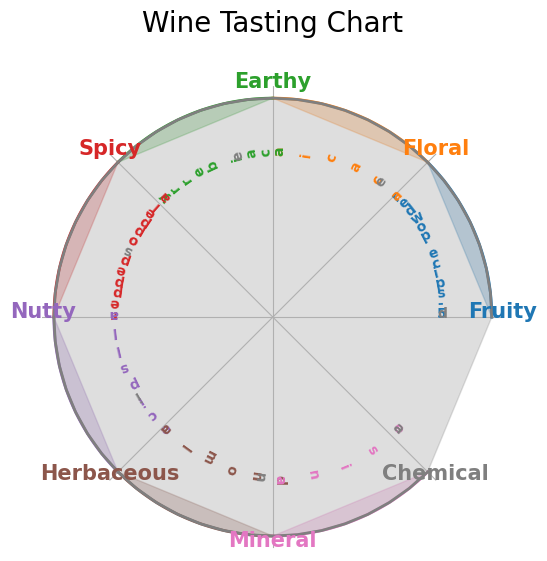

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: categories and their respective keywords
categories = ['Fruity', 'Floral', 'Earthy', 'Spicy', 'Nutty', 'Herbaceous', 'Mineral', 'Chemical']
keywords = [
    ['Apple', 'Pear', 'Peach'], # Fruity
    ['Rose', 'Violet', 'Lavender'], # Floral
    ['Mushroom', 'Wet soil', 'Potato'], # Earthy
    ['Pepper', 'Cinnamon', 'Nutmeg'], # Spicy
    ['Almond', 'Hazelnut', 'Walnut'], # Nutty
    ['Basil', 'Mint', 'Thyme'], # Herbaceous
    ['Flint', 'Wet rock', 'Chalk'], # Mineral
    ['Petrol', 'Plastic', 'Rubber'] # Chemical
]

# Number of categories/segments
num_vars = len(categories)

# Compute angle each category will cover.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is made in a circular (not polygon) format, so we need to complete the loop and append the start to the end.
angles += angles[:1]

# The figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to create the colored segments
def add_category(ax, angles, color, category, keywords_list):
    # Draw the outline of our data.
    ax.fill(angles, [2]*len(angles), color=color, alpha=0.25)
    
    # Add a line for the category
    ax.plot(angles, [2]*len(angles), color=color, linewidth=2)
    
    # Add the category label
    ax.text(angles[0], 2.1, category, horizontalalignment='center', size=15, color=color, weight='bold')
    
    # Add keyword labels
    for keyword, angle in zip(keywords_list, np.linspace(angles[0], angles[-1], len(keywords_list))):
        ax.text(angle, 1.5, keyword, horizontalalignment='left', size=10, color=color, weight='bold', rotation=angle*180/np.pi)

# Colors for each category/segment
colors = plt.cm.tab10.colors[:num_vars]

# Add each category to the chart.
for i, (category, color, kw) in enumerate(zip(categories, colors, keywords_list)):
    add_category(ax, np.linspace(angles[i], angles[i+1], 50), color, category, kw)

# Set the labels for the angular axis (invisible with no labels here)
ax.set_xticks(angles[:-1])
ax.set_xticklabels([])

# Set the position of the radial axis (invisible with no labels here)
ax.set_yticks([])
ax.set_yticklabels([])

# Remove the frame and add a title
ax.spines['polar'].set_visible(False)
ax.set_title('Wine Tasting Chart', size=20, color='black', y=1.1)

# Show the plot
plt.show()
